James Geleta
INST 447 

Introduction:
    The goal of this project is to show the correlation between building permits counts and rental prices across various DC neighborhoods between 2014 and 2017. With this data, we can potentially see if an increase in permits has an effect on rent prices over time. This could show patterns in gentrification and development that could prove very helpful for numerous parties, from developers to urban planners and activists. 
   The data on permits was sourced from DC open data, which provided datasets on zoning information related to permits for each year. The time series data on rental prices was gathered from Zillow, a real estate analytics  company. This data was not formatted for this exploration, and thus had to be manipulated a little. The main variables needed to be tracked were the count of permits for each D.C neighborhood, and the yearly mean prices of rent for each neighborhood. I initially aimed to see how the average income of each neighborhood could also relate to permits and rent, however the dataset I found for income in my initial report was organized by ward rather than neighborhood. This would make it difficult to compare with the rest of the data, so it wasn't included in this analysis. The data on permits is organized by neighborhood cluster, so it would be difficult to pair it in the same dataframe as the rent data, which is simply organized by neighborhood. However, One could easily search online which cluster their neighborhood is in, and then compare the rental data for their neighborhood to the permit count data matching their cluster. Thus data on yearly mean rental prices for each neighborhood is in a separate data frame than data on yearly permit counts for each cluster. Neighborhood clusters are groups of neighborhoods in D.C. Wards, which were used in the unused income dataset, are very large and would not give as detailed of an analysis as neighborhoods or neighborhood clusters. 
   
Method:
    After downloading the data, I first formatted the permit data. Since the datasets were separated by year, I read each one as a dataframe. I then made a new data frame for each year in which the data was grouped by neighborhood cluster, the variable we wanted to sort by. I used the count function to find the counts for each column number. The count of object ID would give the permit count, as each row represented a permit.
    After these counts were found, I took the object ID column from each dataset and made it a column in a new final dataset, giving the number of permits for each year for each neighborhood.
    The Zillow csv featured the rows  with mean rent data for each D.C neighborhood. The columns represented each month for a wide series of dates spanning from the app's conception to 2019. I had to filter it by state (DC) as it was the original spreadsheet had neighborhoods for numerous cities. Once this was done, I made dataframes for each year and moved over the monthly columns pertaining to that year. Finally, I calculated the mean rent price between all months for each yearly dataframe, thus giving the yearly average rent. I then moved these yearly average rents for each neighborhood into a final dataframe.
  



In [379]:
#Preprocessing
import pandas as pd
import numpy as np



In [380]:
#Read in data on zoning purmits from each yearly dataset
permits1=pd.read_csv('Building_Permits_in_2014.csv')
permits2=pd.read_csv('Building_Permits_in_2015.csv')
permits3=pd.read_csv('Building_Permits_in_2016.csv')
permits4=pd.read_csv('Building_Permits_in_2017.csv')
permits5=pd.read_csv('Building_Permits_in_2018.csv')

#change datasets so they give the count of permits for each neighborhood cluster for every yearly dataset
cluster2014=permits1.groupby("NEIGHBORHOODCLUSTER").count()
cluster2015=permits2.groupby("NEIGHBORHOODCLUSTER").count()
cluster2016=permits3.groupby("NEIGHBORHOODCLUSTER").count()
cluster2017=permits4.groupby("NEIGHBORHOODCLUSTER").count()
cluster2018=permits5.groupby("NEIGHBORHOODCLUSTER").count()
#create a new dataframe to move the cluster permit counts from each yearly dataset into a singular dataframe that shows how the permit counts for each cluster for each year
cluster_count=pd.DataFrame()
cluster_count['2014']=cluster2014['OBJECTID']
cluster_count['2015']=cluster2015['OBJECTID']
cluster_count['2016']=cluster2016['OBJECTID']
cluster_count['2017']=cluster2017['OBJECTID']
cluster_count['2018']=cluster2018['OBJECTID']

In [381]:
#read in the data on neighboorhood rents from Zillow
rents=pd.read_csv('Neighborhood_Zri_AllHomesPlusMultifamilyDC.csv')

In [382]:
#filter the data to only feature rents for DC neighborhoods
dc=rents.loc[rents['State'] == 'DC']


In [383]:
#select only the columns for the years needed (2014-2018), then calculate the yearly mean rent of each neighborhood based off the monthly mean rents of each neighborhood. These yearly means for each neighborhood are added to the dataframe yearly_rents.

dc14=dc[['2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12']].mean(axis=1)
dc15= dc[['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']].mean(axis=1)
dc16=dc[['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12']].mean(axis=1)
dc17=dc[['2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12']].mean(axis=1)
dc18= dc[['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12']].mean(axis=1)

yearly_rents=pd.DataFrame()
yearly_rents['Neighborhoods']=dc['RegionName']
yearly_rents['2014_avg'] = dc14
yearly_rents['2015_avg'] = dc15
yearly_rents['2016_avg'] = dc16
yearly_rents['2017_avg'] = dc17


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)


In [384]:
cluster2014=permits1.groupby("NEIGHBORHOODCLUSTER").count()
cluster2015=permits2.groupby("NEIGHBORHOODCLUSTER").count()
cluster2016=permits3.groupby("NEIGHBORHOODCLUSTER").count()
cluster2017=permits4.groupby("NEIGHBORHOODCLUSTER").count()
cluster2018=permits5.groupby("NEIGHBORHOODCLUSTER").count()
cluster_count=pd.DataFrame()
cluster_count['2014']=cluster2014['OBJECTID']
cluster_count['2015']=cluster2015['OBJECTID']
cluster_count['2016']=cluster2016['OBJECTID']
cluster_count['2017']=cluster2017['OBJECTID']
cluster_count['2018']=cluster2018['OBJECTID']



In [385]:
#Vizualizations/Results :

In [386]:
#dataframe for the count of permits issued for each neighborhood cluster for each year 2014-2018
cluster_count.head()

cluster_count


,2014,2015,2016,2017,2018
NEIGHBORHOODCLUSTER,,,,,
Cluster 1,966,1015,923,1044,948
Cluster 10,1122,1123,1061,1232,1185
Cluster 11,1278,1267,1133,1326,1244
Cluster 12,599,584,537,521,565
Cluster 13,1445,1362,1278,1467,1566
Cluster 14,803,857,778,785,595
Cluster 15,1021,974,869,891,861
Cluster 16,372,419,386,374,426
Cluster 17,1097,1260,1226,1324,1436


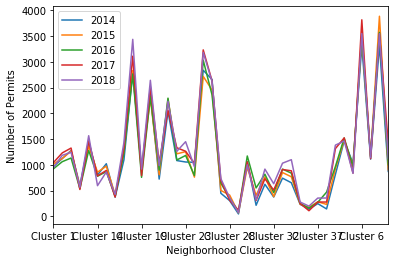

In [387]:
#visualizaiton for cluster counts
cluster_plot=cluster_count.plot()
cluster_plot.set_xlabel("Neighborhood Cluster")
cluster_plot.set_ylabel("Number of Permits")
cluster_plot

In [388]:
#dataframe for the mean rent of each neighborhood for each year 2014-2018
display(yearly_rents)
yearly_rents

,Neighborhoods,2014_avg,2015_avg,2016_avg,2017_avg
338,Columbia Heights,2375.825455,2425.370000,2469.776667,2507.980833
394,Capitol Hill,2252.604545,2245.537500,2319.905000,2351.843333
589,Petworth,1766.446364,1798.523333,1922.616667,1950.208333
711,Washington Highlands,1430.105833,1498.405833,1547.130000,1641.053333
733,Adams Morgan,2711.510909,2768.417500,2818.426667,2837.295000
746,Logan Circle,2608.769091,2573.680000,2632.077500,2598.613333
870,Sixteenth Street Heights,1878.900000,1986.829167,2034.675833,2020.580000
1015,Dupont Circle,2468.006364,2445.690833,2509.704167,2473.280000
1077,Chevy Chase,1847.580000,1869.435833,2043.755833,1975.591667
1112,Foggy Bottom,2427.545455,2431.631667,2403.421667,2399.445000


,Neighborhoods,2014_avg,2015_avg,2016_avg,2017_avg
338,Columbia Heights,2375.825455,2425.370000,2469.776667,2507.980833
394,Capitol Hill,2252.604545,2245.537500,2319.905000,2351.843333
589,Petworth,1766.446364,1798.523333,1922.616667,1950.208333
711,Washington Highlands,1430.105833,1498.405833,1547.130000,1641.053333
733,Adams Morgan,2711.510909,2768.417500,2818.426667,2837.295000
746,Logan Circle,2608.769091,2573.680000,2632.077500,2598.613333
870,Sixteenth Street Heights,1878.900000,1986.829167,2034.675833,2020.580000
1015,Dupont Circle,2468.006364,2445.690833,2509.704167,2473.280000
1077,Chevy Chase,1847.580000,1869.435833,2043.755833,1975.591667
1112,Foggy Bottom,2427.545455,2431.631667,2403.421667,2399.445000


Text(0, 0.5, 'Rent')

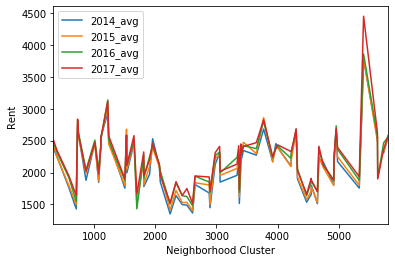

In [389]:
#viualization for yearly rents
yearly_rents=yearly_rents.plot()
yearly_rents.set_xlabel("Neighborhood Cluster")
yearly_rents.set_ylabel("Rent")

Data Sources:
Data on D.C redevelopment permits (year in url would be changed depending on set needed):
“Building Permits in 2013.” Opendata.dc.gov,
https://opendata.dc.gov/datasets/building-permits-in-2013.
Data on rent prices by neighborhood:
“Housing Data.” Zillow Research, https://www.zillow.com/research/data/.

Discussion: 


    While these results were not exactly descript and rather broad, they can still give us some conclusions. For instance, when cross examining the neighborhood cluster rent data and neighborhood permit data, one may find that some neighborhoods have experienced exponential permit growth. For instance neighborhood cluster 18 has grown from 2779 to 3439 permits between 2014 to 2018. This represents the neighborhoods of Brightwood Park, Crestwood, and Petworth, which saw considerable increases in rent. For instance, Petworth rent grew from $1766 to $1950 in just five years! Surprisingly, districts with very low levels of development like cluster 28 had neighborhoods that were rather affluent, and had rises in rent. One such neighborhood is Anacostia, which had a rent increase from $1515 to $1729
    One would think that more affluent areas would face more development, however some areas with very high rents actually had the fewest permits listed. For instance Kalorama, one of the richest neighborhoods in D.C, was stagnant in terms of permits, and actually faced a lower number in 2018 than in 2014. Perhaps this is a result of strict building regulations on historic buildings in such an affluent area. Another factor that may cause this is that lower income areas may have a higher population density, and thus a need for more permits.
    As one can see from the latter statement, there are countless factors that could affect the issuing of permits and rent prices in neighborhoods. Because of this, I believe that permit counts is a rather poor proxy for predicting gentrification in up and coming neighborhoods. Other types of data, such as demographics or income would likely be a better prediction, but unfortunately I was unable to analyze those. However, there was still a significant amount of insight made from this analysis.
    
Limitations:
    As stated before, I faced limitations in terms of the types of data from various sources, thus limiting the scope of this project. For instance, the income data source sorted neighborhoods by ward, which was incompatible with clusters. I also found that the Zillow dataset was slightly lacking. For instance, Some neighborhoods such as Kenilworth and others in cluster 28 seem to be missing. I was very interested in those neighborhoods, as they had the lowest count of permits. This lack of accuracy and access significantly limits the scope of these findings. In proposing this project I was surprised at the lack of easy to access data sources. Many data sources were only found on outdated government sites, and much of the data I found was incomplete or limited to very specific time frames. 
    Aside from these limitations from my sources, I was also somewhat limited in my knowledge. Perhaps with a better understanding of technologies not covered in this unit, I could have used data from geographic or spatial imaging applications to visualize this data in an aesthetically pleasing manner. I was also limited in my knowledge of D.C geography. Before analyzing these datasets I had no knowledge of the D.C's municipal organization. I still am somewhat confused by how the different clusters and wards are divided and their significance, which made interpreting the results of this project somewhat difficult. 
    
   Conclusion:
       Overall, it seems that the amount of permits do not correlate heavily with rent prices. This could possibly be from the numerous extraneous factors that affect the issuing of permits, such as neighborhood specific zoning laws, and populaiton. Thus permit count is not a great proxy for analyzing/predicting gentrification in neighborhoods.

